In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [65]:
file = pd.read_csv('/home/codetrade/Downloads/Classified Data')

In [66]:
file.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [67]:
file.tail()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


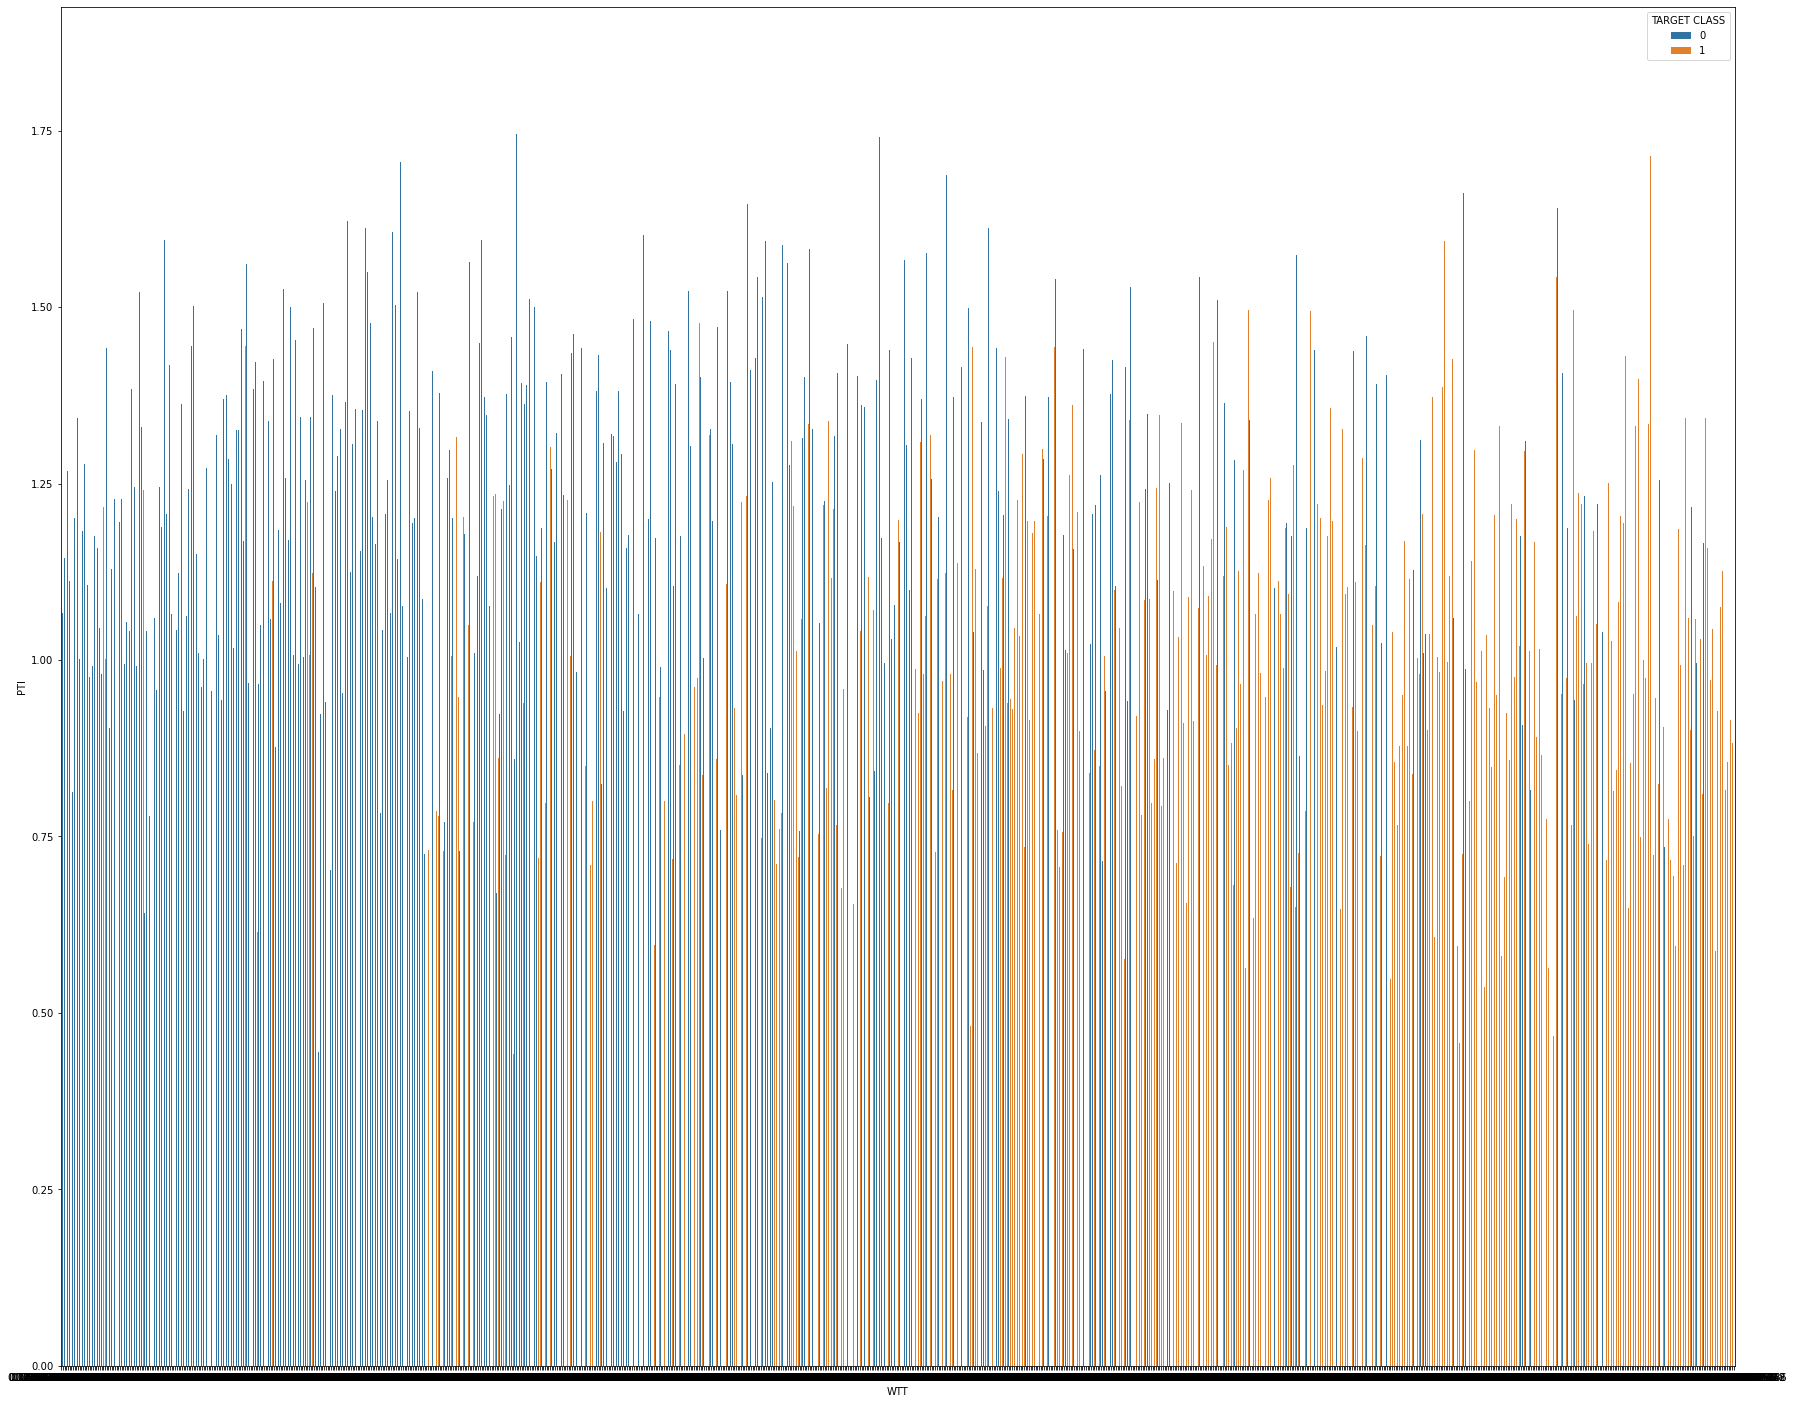

In [68]:
sns.barplot(x="WTT", y="PTI", hue="TARGET CLASS", data=file);

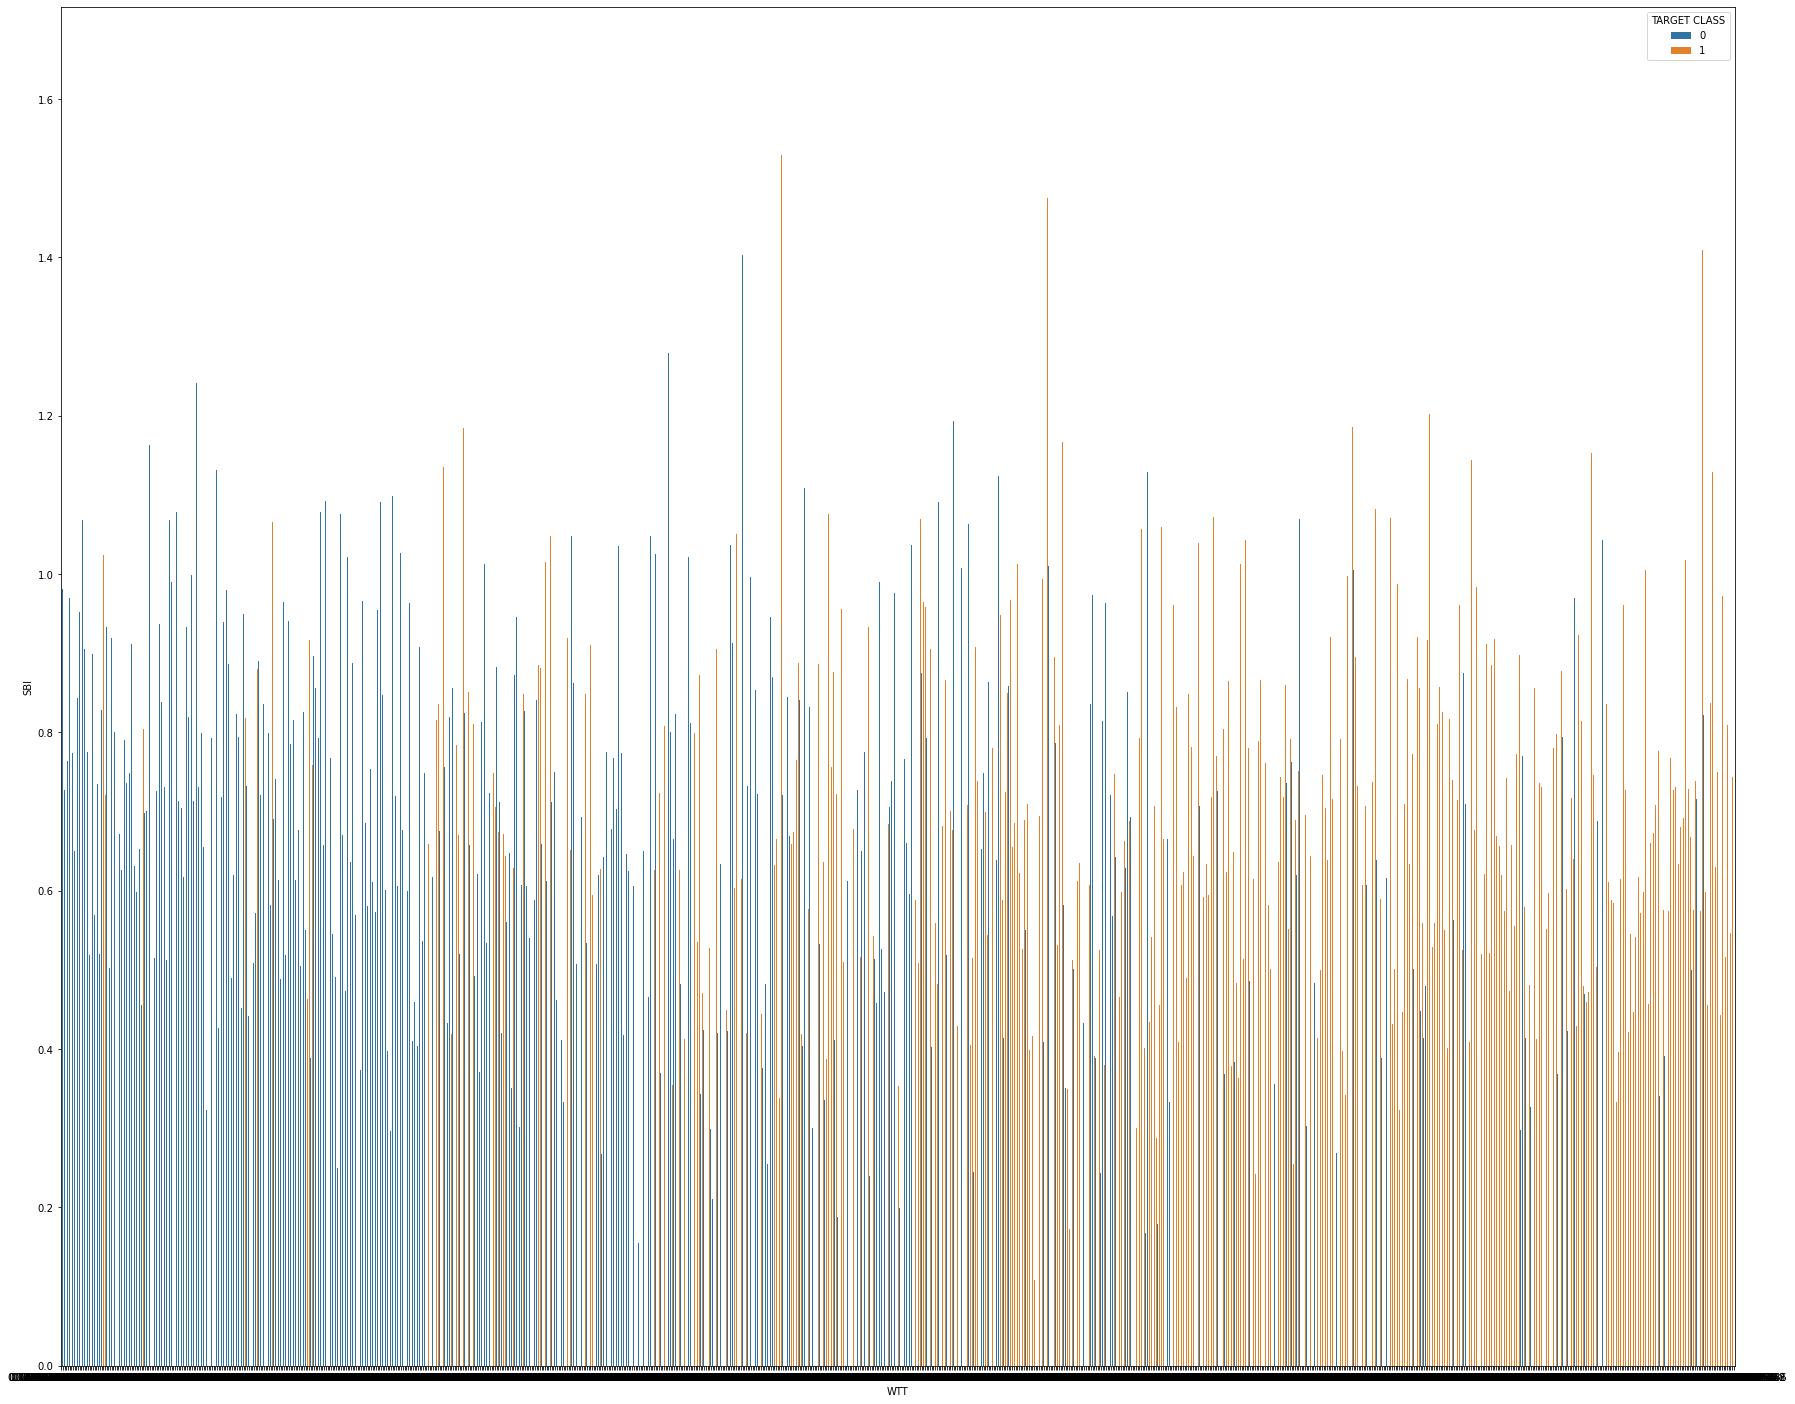

In [39]:
sns.barplot(x="WTT", y="SBI", hue="TARGET CLASS", data=file);

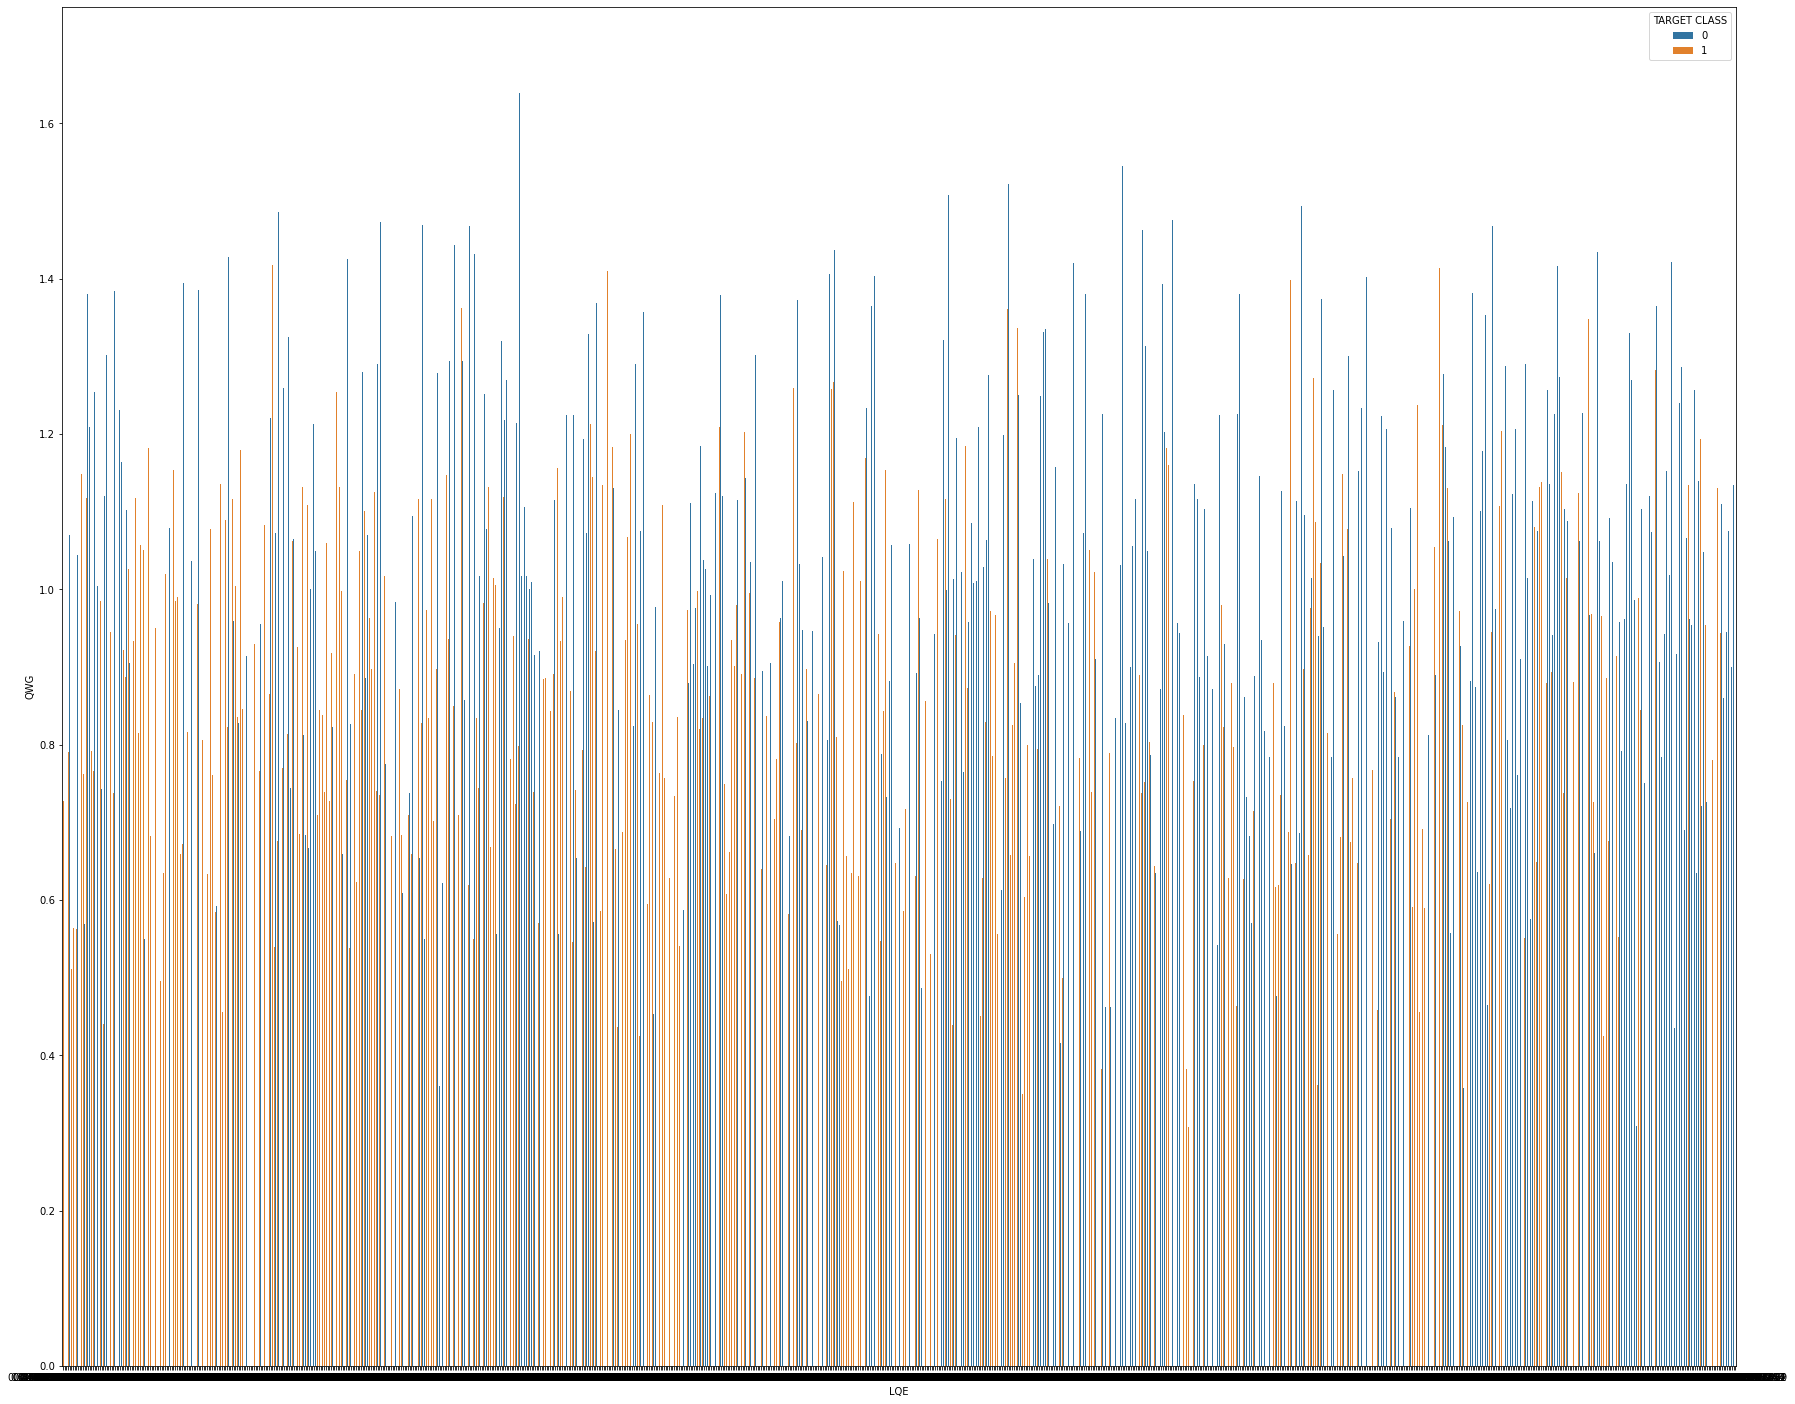

In [40]:
sns.barplot(x="LQE", y="QWG", hue="TARGET CLASS", data=file);

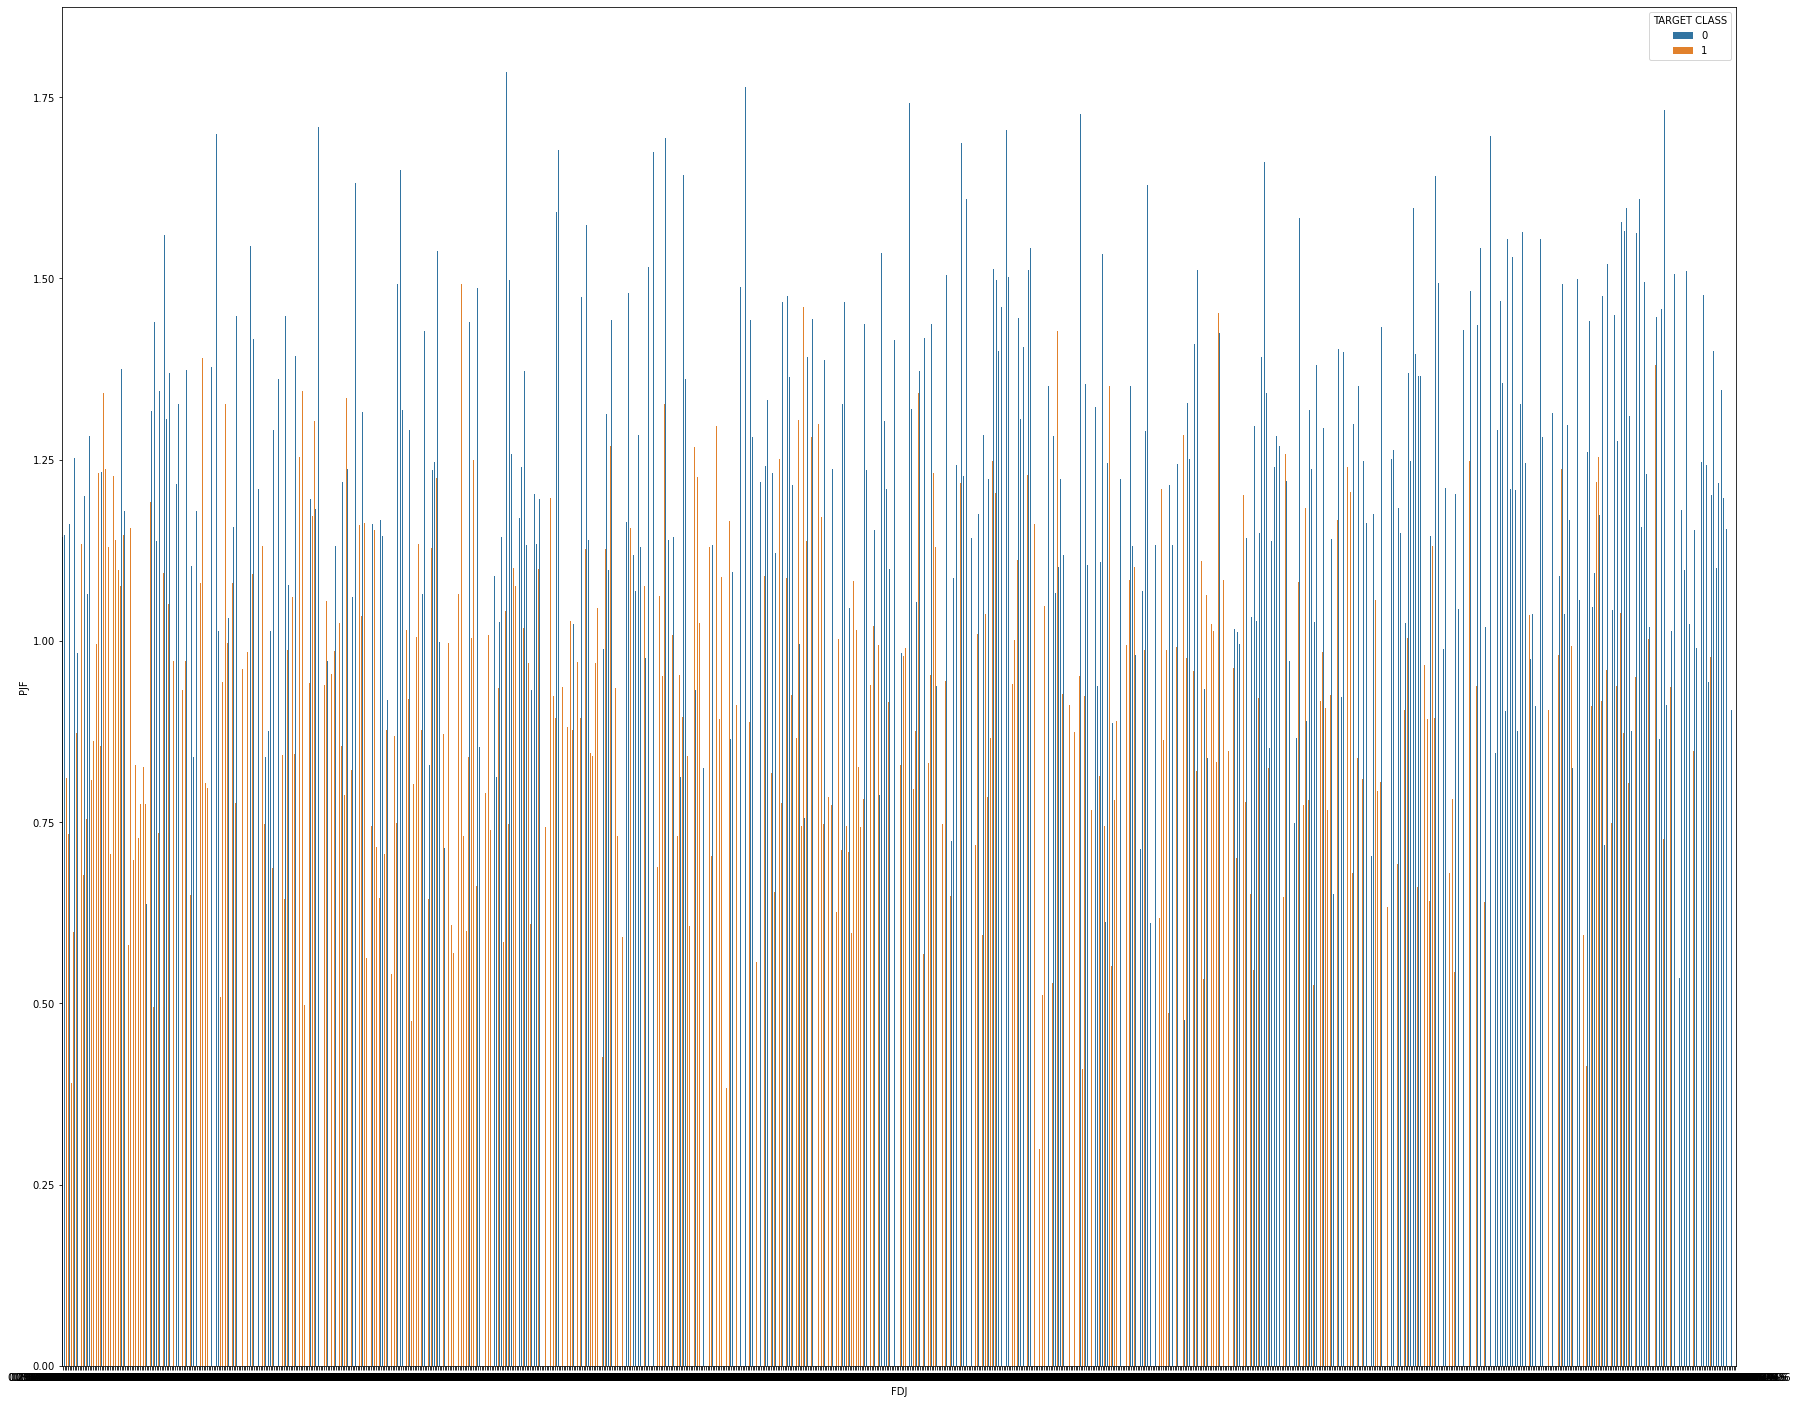

In [41]:
sns.barplot(x="FDJ", y="PJF", hue="TARGET CLASS", data=file);

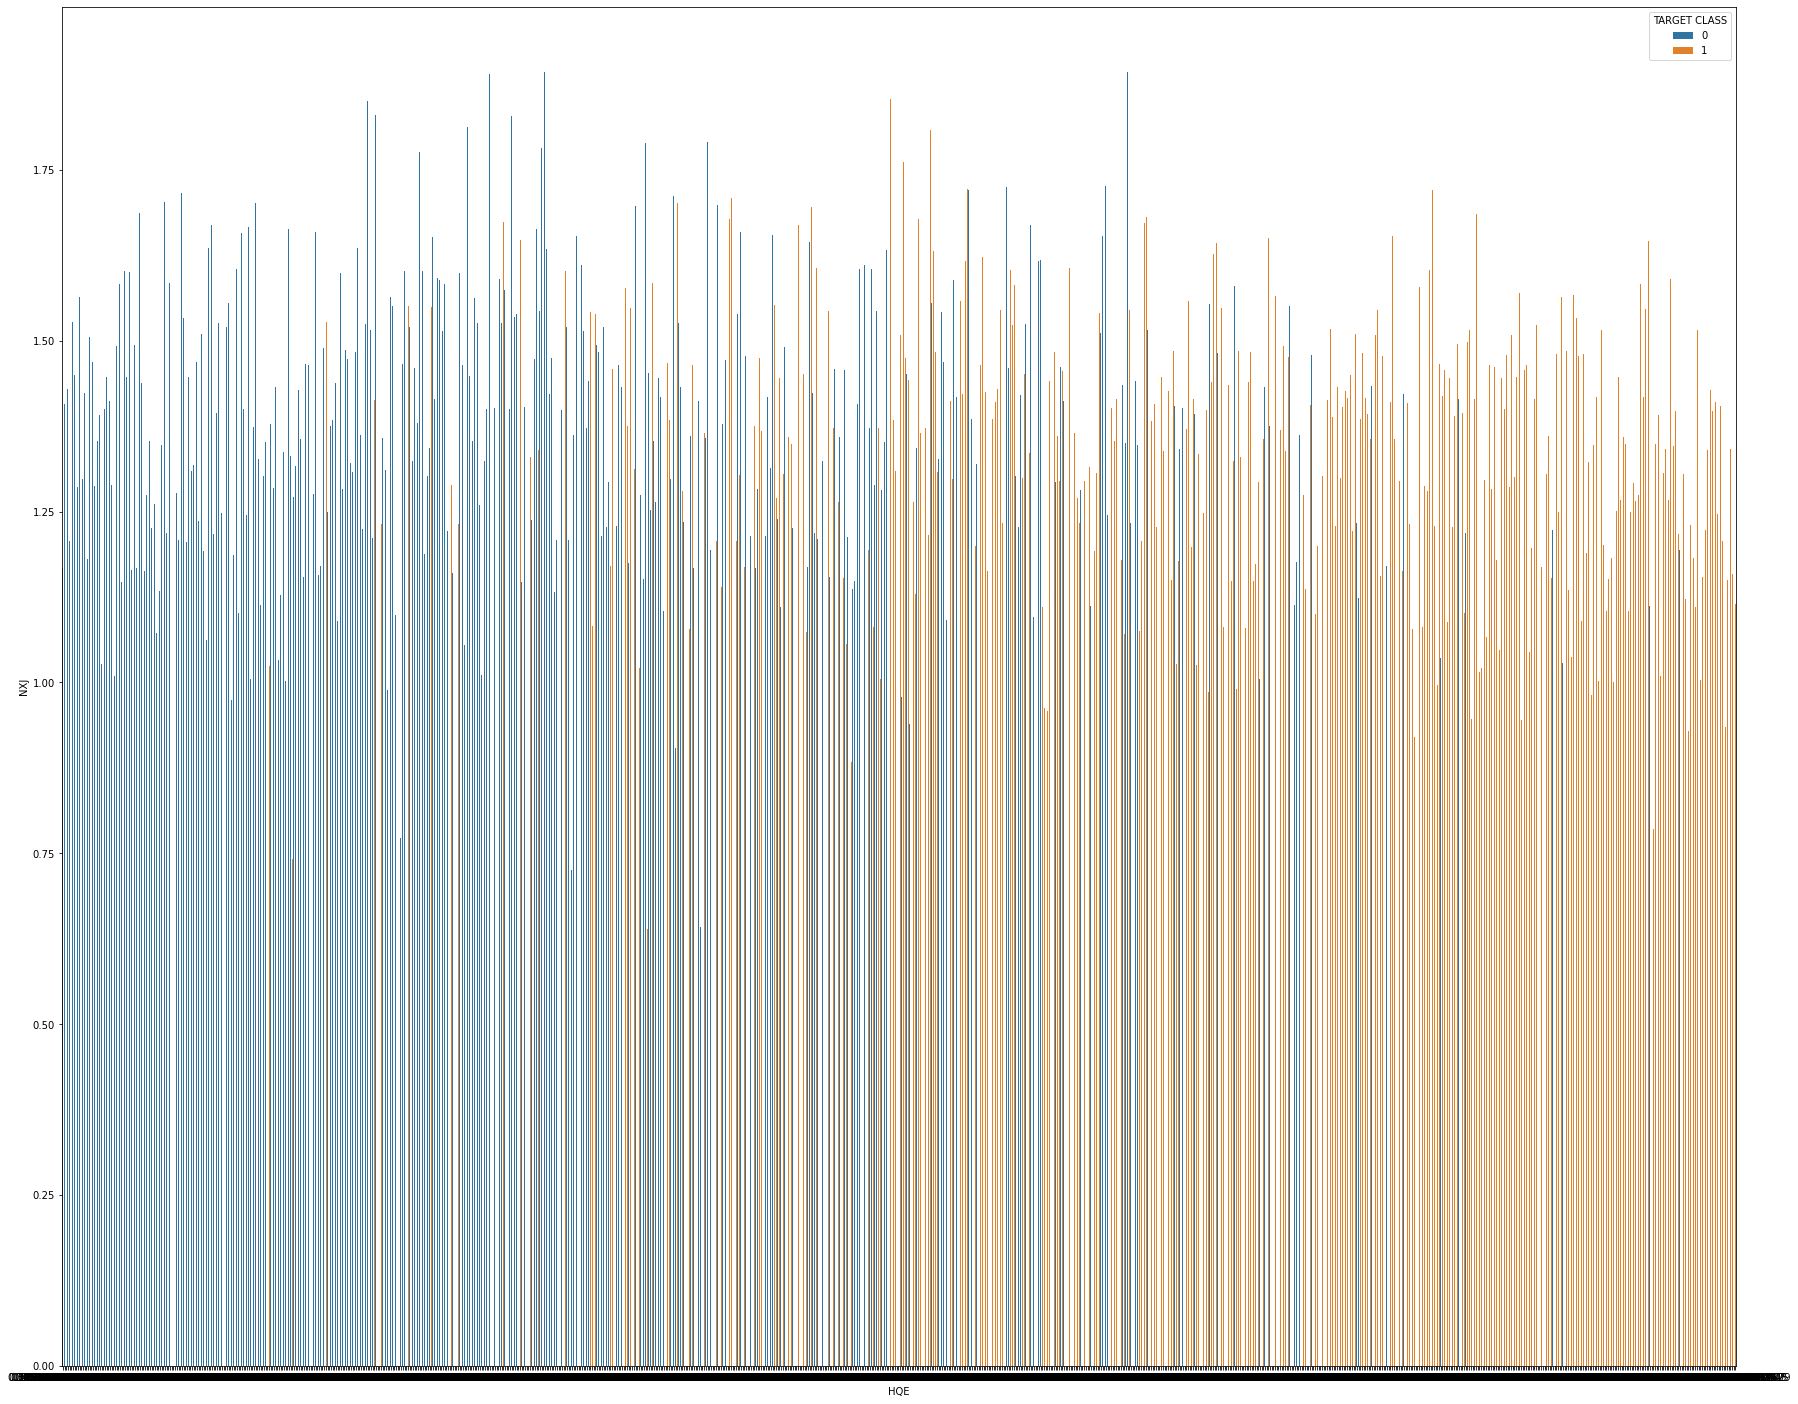

In [42]:
sns.barplot(x="HQE", y="NXJ", hue="TARGET CLASS", data=file);

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
scaler.fit(file.drop('TARGET CLASS',axis=1))

StandardScaler()

In [46]:
scaled_features = scaler.transform(file.drop('TARGET CLASS',axis=1))

In [47]:
df_feat = pd.DataFrame(scaled_features,columns=file.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,file['TARGET CLASS'],test_size=0.30)

###### Using KNN


###### Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [53]:
pred = knn.predict(X_test)

# Predictions and Evaluations

Evaluate our KNN model

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(confusion_matrix(y_test,pred))

[[138  22]
 [ 10 130]]


In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       160
           1       0.86      0.93      0.89       140

    accuracy                           0.89       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300



# Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value

In [57]:
error_rate = []
for i in range(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

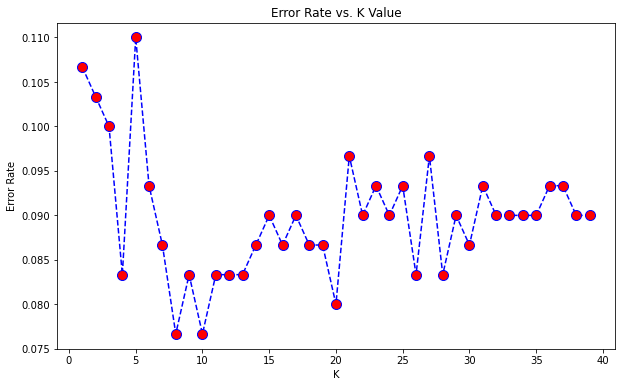

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [59]:
# FIRST COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[138  22]
 [ 10 130]]


              precision    recall  f1-score   support

           0       0.93      0.86      0.90       160
           1       0.86      0.93      0.89       140

    accuracy                           0.89       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300



In [60]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[145  15]
 [  8 132]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       160
           1       0.90      0.94      0.92       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [61]:
file.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


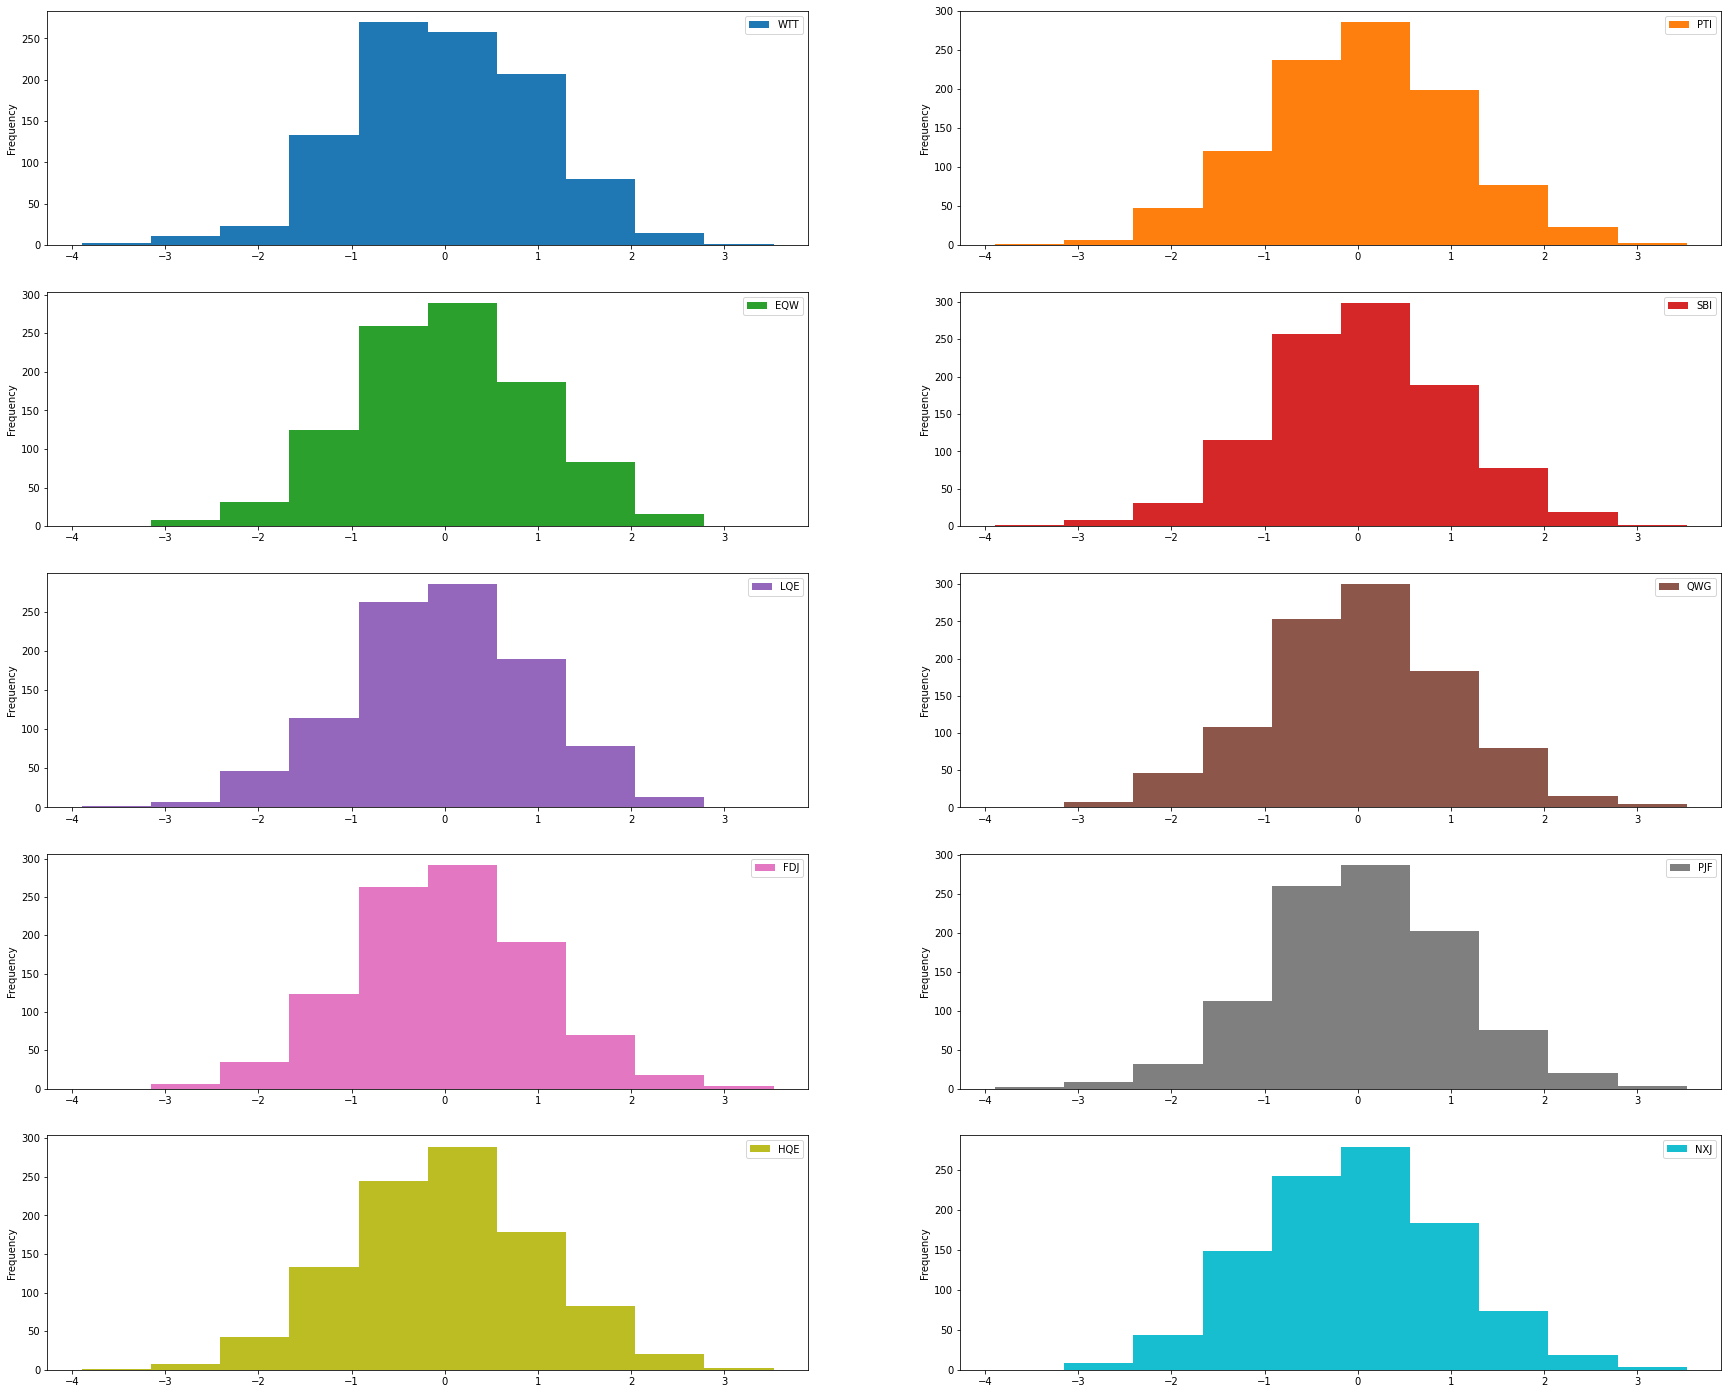

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample dataframe
file = pd.DataFrame(np.random.randn(1000, 10), columns=['WTT', 'PTI', 'EQW', 'SBI', 'LQE','QWG','FDJ','PJF','HQE','NXJ'])

plt.rcParams['figure.figsize']=(30,25)
file.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()


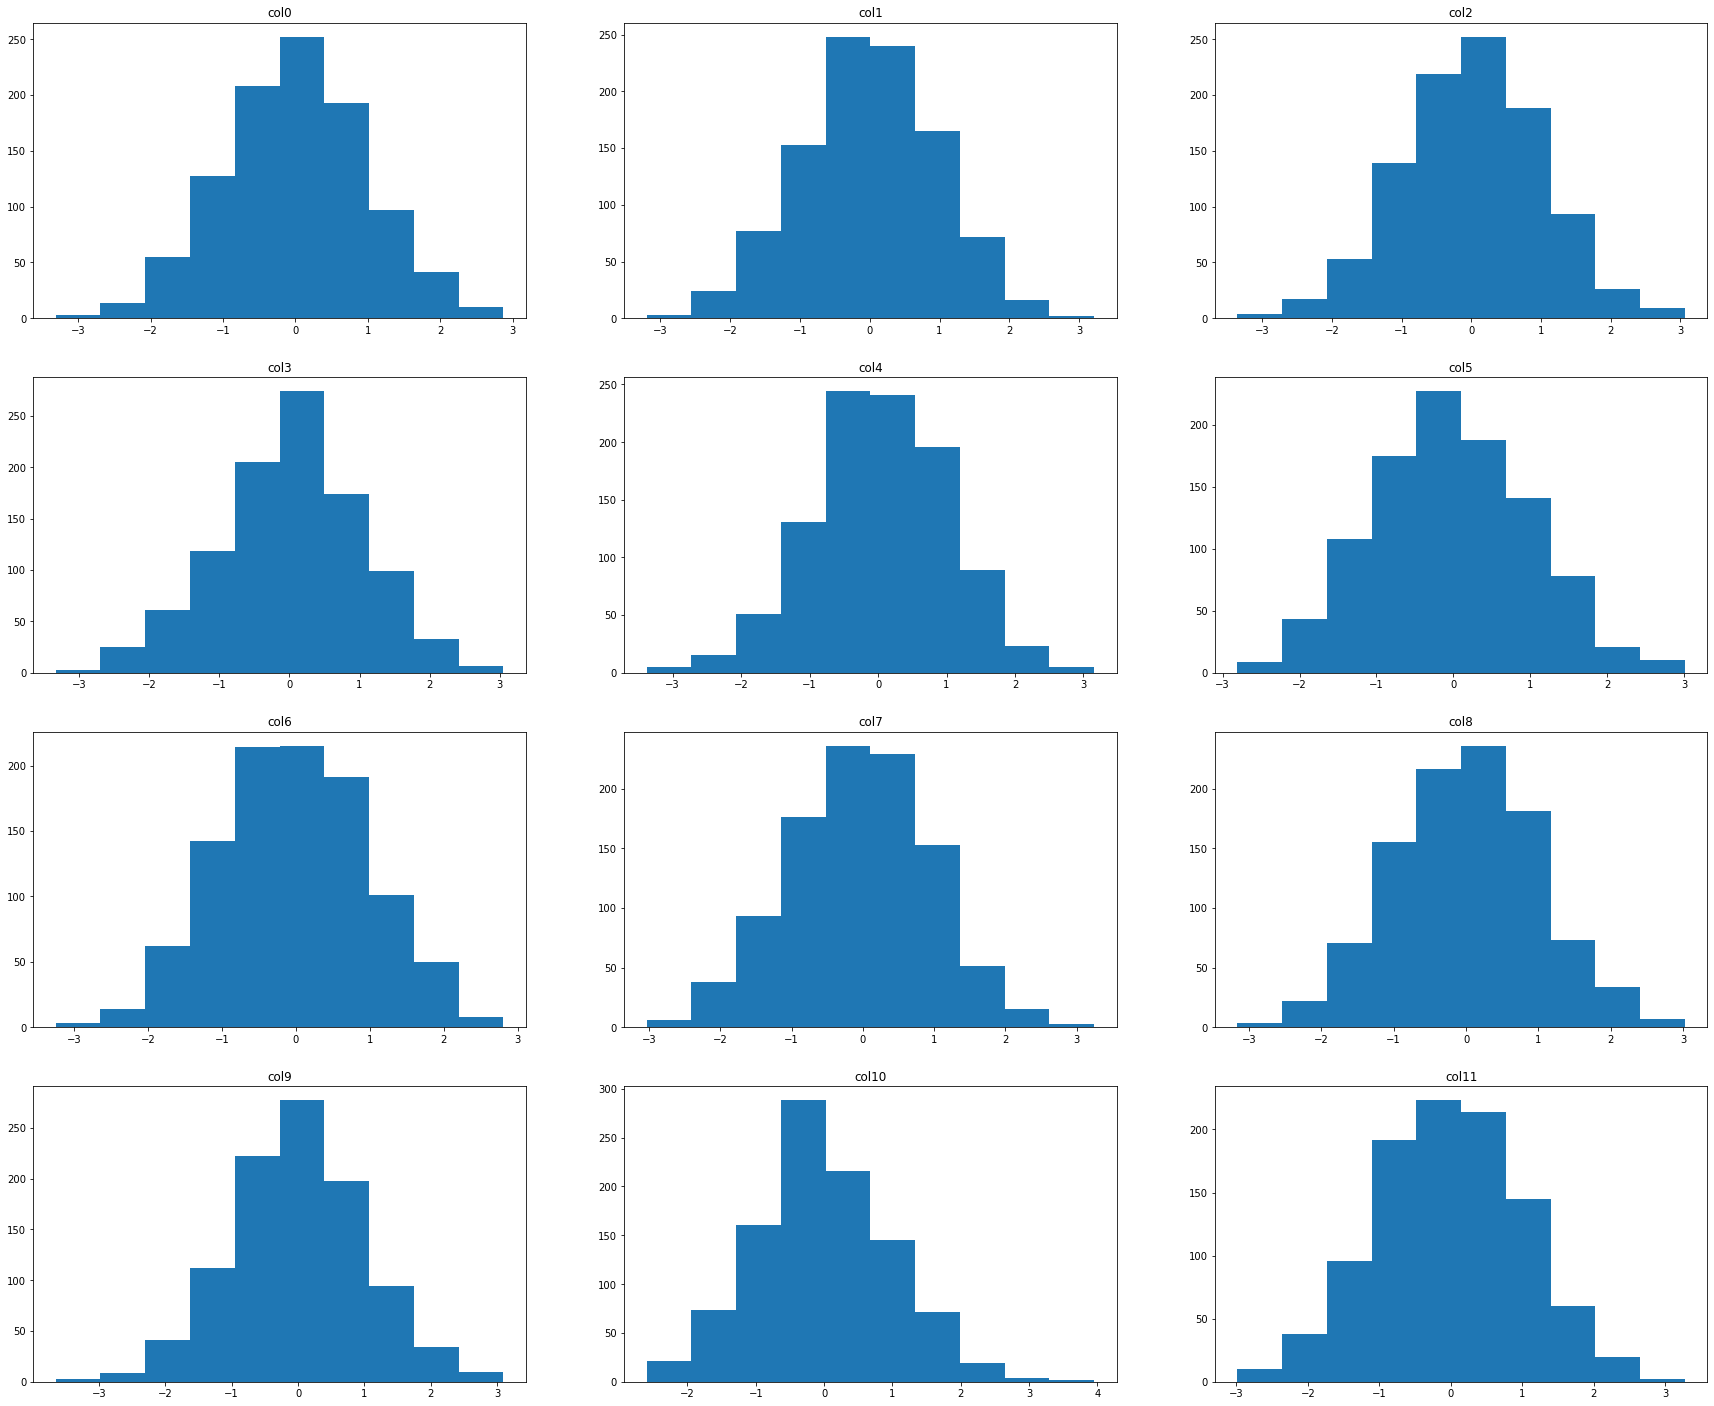

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file = pd.DataFrame(np.random.randn(1000, 12), columns=['col'+str(i) for i in range(12)])

plt.rcParams['figure.figsize']=(30,25)

# Select the first 12 columns to plot
cols_to_plot = file.columns[:12]

# Create a 4x3 grid of subplots
fig, axs = plt.subplots(nrows=4, ncols=3)

# Flatten the array of subplots to allow for iteration
axs = axs.flatten()

# Iterate over the columns and plot each one in a subplot
for i, col in enumerate(cols_to_plot):
    axs[i].hist(file[col], bins=10)
    axs[i].set_title(col)

# Remove any unused subplots
for ax in axs[len(cols_to_plot):]:
    ax.remove()

plt.show()
